In [123]:
import tensorflow as tf
print("Tensorflow: v" + tf.__version__)

Tensorflow: v2.4.1


## Fundamental Core Algothms
- Linear Regression
- Classification
- Clustering
- Hidden Markov Models

### Linear Regression
- Used to predict numeric values 
- eg. predict y values from the x values
- Use line of best fit to predict future values
- However, this works in more than 2 dimension. If you have 3 dimension graph, you can use 2 dimension to get the last one

In [124]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

In [125]:
# using titanic dataset from tensorflow
# load into a panda dataframe to view the data
dftrain = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv") # to train
dfeval = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/eval.csv") # to test
# print(dftrain.head())

y_train = dftrain.pop("survived")
y_eval = dfeval.pop("survived")

# print at specific index
# print(dftrain.loc[0], y_train.loc[0])

`.describe()` to describe the dataset and provide some statistical analysis

In [126]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [127]:
#shape of the training dataset
dftrain.shape
# dfeval.shape

(627, 9)

## Some graphs from the training data

<AxesSubplot:>

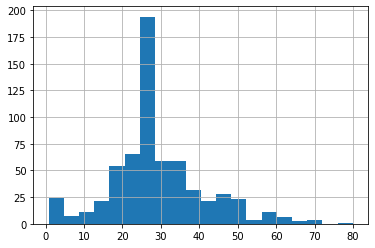

In [128]:
dftrain.age.hist(bins=20)

<AxesSubplot:>

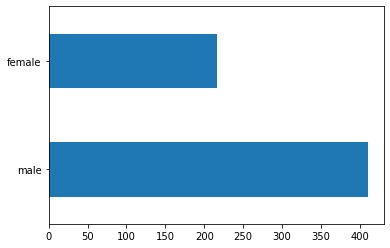

In [129]:
dftrain.sex.value_counts().plot(kind="barh")

<AxesSubplot:>

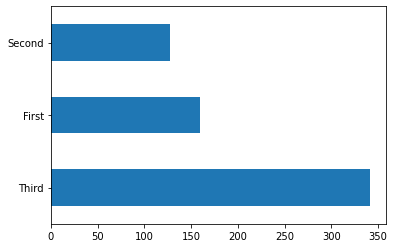

In [130]:
dftrain["class"].value_counts().plot(kind="barh")

Text(0.5, 0, '% survive')

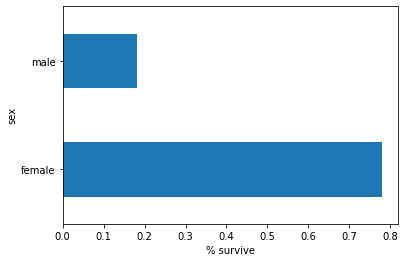

In [131]:
pd.concat([dftrain, y_train], axis=1).groupby("sex").survived.mean().plot(kind="barh").set_xlabel("% survive")

### Categoric Data vs Numerical Data
- Categoric data should have a certain category that they fall under 
- eg. gender = male or female or deck = first, second or third
- For categoric data, we need to map it to different numeric values eg. male = 0 and female = 1


- Numerical data eg. age or fare

In [132]:
C_COL = ["sex", "n_siblings_spouses", "parch", "class", "deck", "embark_town", "alone"]
N_COL = ["age", "fare"]

fc = [] #feature column
for fn in C_COL: #feature name in column
    voc = dftrain[fn].unique() #vocab - a list of all unique values from fn
    fc.append(tf.feature_column.categorical_column_with_vocabulary_list(fn, voc))
    
for fn in N_COL:
    fc.append(tf.feature_column.numeric_column(fn, dtype=tf.float32))

print(fc)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

### Training the Model
- Feed the model information from the dataset
- With large models that have big dataset, need to load in batches
- **epoch** = how many times the model see the same data
- which feed the data again but in a different order. but this may lead to **overfitting**
- to prevent overfitting, start with a low epoch and increament it


- **input function** - define how the data is broken into epoch to feed into the data
- will encode into `tf.data.Dataset` object

In [133]:
# Input function

def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

### Creating the Model

In [134]:
linear_est = tf.estimator.LinearClassifier(feature_columns=fc) #creating estimator
linear_est.train(train_input_fn) #training the model
result = linear_est.evaluate(eval_input_fn) #evaluating the model

clear_output() # clear output from training
print(result)

{'accuracy': 0.7613636, 'accuracy_baseline': 0.625, 'auc': 0.83370066, 'auc_precision_recall': 0.79276276, 'average_loss': 0.4748347, 'label/mean': 0.375, 'loss': 0.46696758, 'precision': 0.6956522, 'prediction/mean': 0.36483607, 'recall': 0.64646465, 'global_step': 200}


### Using the Model to make Predictions

In [135]:
result = list(linear_est.predict(eval_input_fn))
# can check the data for each result 
# dfeval.loc[index]
# y_eval.loc[index]
for p in result:
    print(p["probabilities"])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/95/jh39mtrx5298hj0gklkx1gym0000gn/T/tmphizfrfx0/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[0.92459154 0.07540846]
[0.72103316 0.27896687]
[0.3244906 0.6755094]
[0.38728467 0.61271536]
[0.74563164 0.25436836]
[0.25881335 0.7411866 ]
[0.4525214  0.54747856]
[0.8928723  0.10712781]
[0.41025722 0.58974284]
[0.28058556 0.7194144 ]
[0.3333322 0.6666678]
[0.8929196  0.10708042]
[0.1686232  0.83137685]
[0.64685076 0.35314918]
[0.17343573 0.82656425]
[0.50625634 0.4937436 ]
[0.8436701  0.15632987]
[0.18308431 0.8169157 ]
[0.63743156 0.36256844]
[0.9122161  0.08778387]
[0.89024407 0.10975595]
[0.92404956 0.07595042]
[0.35519463 0.6448054 ]
[0.93017983 0.06982016]
[0.34285888 0.65714103]
[0.4558995 0.5441005]
[0.824041   0.17595898]
[0.77299356 0.22700645]
[0.78686756 0.21313237]

## Classification

- Used to seperate data points into classes of different labels


### Loading the dataset

In [136]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import pandas as pd

# Using Iris Flower dataset
CSV_COL_NAME = ["SepalLength", "SepdalWidth", "PetalLength", "PetalWidth", "Species"]
SPECIES = ["Setosa", "Versicolor", "Virginia"]

train_path = tf.keras.utils.get_file("iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file("iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COL_NAME, header=0)
test = pd.read_csv(test_path, names=CSV_COL_NAME, header=0)

train.head()


,SepalLength,SepdalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [137]:
train_y = train.pop("Species")
test_y = test.pop("Species")

train.head()

,SepalLength,SepdalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [138]:
train.shape

(120, 4)

### Input Function and Feature Column

In [139]:
# input function
def input_fn(feat, lab, train=True, bs=256): #features, labels, training, batch_size
    ds = tf.data.Dataset.from_tensor_slices((dict(feat), lab))
    if train:
        ds = ds.shuffle(1000).repeat()
    return ds.batch(bs)

# feature column
fc = []
for k in train.keys():
    fc.append(tf.feature_column.numeric_column(key=k))
print(fc)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepdalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


### Building the Model
- Using pre-built classifier that are built-in tensorflow
- ***DNNClassifier*** (Deep Neural Network)
- ***LinearClassifier***

In [140]:
# hidden units = 2 layers of 30 nodes and 10 nodes
classifier = tf.estimator.DNNClassifier(feature_columns=fc, hidden_units=[30,10], n_classes=3) 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/95/jh39mtrx5298hj0gklkx1gym0000gn/T/tmpuchmm9po', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Training the Model

In [156]:
classifier.train(input_fn=lambda: input_fn(train, train_y, train=True), steps=5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/95/jh39mtrx5298hj0gklkx1gym0000gn/T/tmpuchmm9po/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 5000...
INFO:tensorflow:Saving checkpoints for 5000 into /var/folders/95/jh39mtrx5298hj0gklkx1gym0000gn/T/tmpuchmm9po/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 5000...
INFO:tensorflow:loss = 0.4842295, step = 5000
INFO:tensorflow:global_step/sec: 313.013
INFO:tensorflow:loss = 0.47953856, step = 5100 (0.321 sec)
INFO:tensorflow:global_step/sec: 340.893
INFO:tensorflow:loss = 0.480792, step = 5200 (0.293 sec)
INFO:tensorflow:global_step/sec: 377.679
INFO:tensorflow:loss = 0.48163217, step = 5300 (0.265 sec)
INFO:tensorflow:global_

### Using the model to make predictions

In [157]:
classifier.evaluate(input_fn=lambda: input_fn(test, test_y, train=False))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-02-12T23:57:56Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/95/jh39mtrx5298hj0gklkx1gym0000gn/T/tmpuchmm9po/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.45663s
INFO:tensorflow:Finished evaluation at 2021-02-12-23:57:57
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.93333334, average_loss = 0.40911797, global_step = 10000, loss = 0.40911797
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10000: /var/folders/95/jh39mtrx5298hj0gklkx1gym0000gn/T/tmpuchmm9po/model.ckpt-10000


{'accuracy': 0.93333334,
 'average_loss': 0.40911797,
 'loss': 0.40911797,
 'global_step': 10000}

In [158]:
results = list(classifier.predict(input_fn=lambda: input_fn(test, test_y, train=False)))

for n in results:
    pred = n["class_ids"][0]
    prob = n["probabilities"]
    print(f"Prediction: {SPECIES[pred]} - {prob[pred] * 100}%, Probability = {prob}")

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/95/jh39mtrx5298hj0gklkx1gym0000gn/T/tmpuchmm9po/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction: Versicolor - 53.89553904533386%, Probability = [0.0756025 0.5389554 0.3854421]
Prediction: Virginia - 66.51661992073059%, Probability = [0.0177104  0.31712332 0.6651662 ]
Prediction: Setosa - 86.73292398452759%, Probability = [0.86732924 0.10283857 0.02983219]
Prediction: Versicolor - 49.31774437427521%, Probability = [0.05474228 0.49317744 0.4520803 ]
Prediction: Versicolor - 52.16040015220642%, Probability = [0.08263214 0.521604   0.3957638 ]
Prediction: Versicolor - 58.20889472961426%, Probability = [0.09566032 0.58208895 0.32225084]
Prediction: Setosa - 95.82270383834839%, Probability = [0.95822704 0.03422846 0.00754449]
Prediction: Virginia - 59.894901514053345%